<a href="https://colab.research.google.com/github/fedecarboni7/algoritmos_y_programacion_1/blob/main/Registro_Contable_22_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerías y definir Dataframe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_22 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/1-1-22_31-12-22.xls')

df_23 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/1-1-23_31-12-23.xls')

In [ ]:
df_22_23 = pd.concat([df_22, df_23], axis=0)

# Análisis EDA

In [ ]:
df_22_23.head()

,Fecha,Cuenta,Categoría,Subcategorías,Nota,ARS,Ingreso/Gasto,Nota.1,Importe,Moneda,Cuenta.1
0,31/12/2022,Deel,Impuestos/Comisiones,Crypto,Comisiones,1669.03,Gasto,NaN,5.10,USD,5.10
1,31/12/2022,Deel,Binance Earn,NaN,Transferencia,102726.91,Dinero gastado,Deel → Binance Earn,313.90,USD,313.90
2,31/12/2022,Brubank,Otro,NaN,Interés mensual ganado,0.33,Ingreso,NaN,0.33,ARS,0.33
3,31/12/2022,Binance Earn,Para el Reino,Diezmo,Iglesia Ceec,23800.00,Gasto,$22908.20,70.00,USD,70.00
4,30/12/2022,Deel,Moda,Zapatos,Zapatillas Nike,7144.00,Gasto,Regalo mamá (20USD),20.00,USD,20.00


In [ ]:
df_22_23.tail()

,Fecha,Cuenta,Categoría,Subcategorías,Nota,ARS,Ingreso/Gasto,Nota.1,Importe,Moneda,Cuenta.1
457,03/01/2023,Binance Earn,Binance Card,NaN,Transferencia,6560.0,Dinero gastado,NaN,20.0,USD,20.0
458,03/01/2023,Visa Banco Ciudad,Salud,NaN,Dentista,4500.0,Gasto,Limpieza dental,4500.0,ARS,4500.0
459,03/01/2023,Brubank,Auto,Mantenimiento,Repuestos,3200.0,Gasto,Bieleta embrague original,3200.0,ARS,3200.0
460,03/01/2023,Billetera,Auto,Mantenimiento,Mecánico,4500.0,Gasto,Arreglo embrague,4500.0,ARS,4500.0
461,03/01/2023,Brubank,Comida,Almuerzo,Delivery,798.8,Gasto,McDonald's,798.8,ARS,798.8


In [ ]:
df_22_23.dtypes

Fecha             object
Cuenta            object
Categoría         object
Subcategorías     object
Nota              object
ARS              float64
Ingreso/Gasto     object
Nota.1            object
Importe          float64
Moneda            object
Cuenta.1         float64
dtype: object

In [ ]:
df_22_23.shape

(1450, 11)

In [ ]:
df_22_23 = df_22_23.drop(columns='Cuenta.1')

In [ ]:
df_22_23 = df_22_23.rename(columns={'Nota.1': 'Nota 2'})

In [ ]:
df_22_23['Fecha'] = pd.to_datetime(df_22_23['Fecha'], format='%d/%m/%Y')
df_22_23 = df_22_23.sort_values('Fecha')
df_22_23 = df_22_23.reset_index(drop=True)

In [ ]:
df_22_23['Importe (USD)'] = df_22_23['Importe']
df_22_23.loc[df_22_23['Moneda'] == 'ARS', 'Importe (USD)'] = df_22_23.loc[df_22_23['Moneda'] == 'ARS', 'Importe'] / 490

,Fecha,Cuenta,Categoría,Subcategorías,Nota,ARS,Ingreso/Gasto,Nota 2,Importe,Moneda,Importe (USD)
0,2022-01-01,Santander Pesos,Salario,NaN,Pago de haberes,90462.00,Ingreso,NaN,90462.00,ARS,184.616327
1,2022-01-01,Santander Pesos,Para el Reino,Diezmo,Iglesia Ceec,9050.00,Gasto,NaN,9050.00,ARS,18.469388
2,2022-01-03,Santander Pesos,Auto,Peajes,Peajes,218.00,Gasto,NaN,218.00,ARS,0.444898
3,2022-01-03,Santander Pesos,Gastos del hogar,Internet,Fibertel,2462.00,Gasto,NaN,2462.00,ARS,5.024490
4,2022-01-03,Santander Pesos,Supermercado,Compras casa,Jumbo,2804.15,Gasto,NaN,2804.15,ARS,5.722755
5,2022-01-03,Santander Pesos,Deel,NaN,Teclado Inalámbrico,2619.00,Dinero gastado,WFH Benefit\n14usd,2619.00,ARS,5.344898
6,2022-01-03,Santander Pesos,Moda,Ropa,anteojos de sol,246.75,Gasto,cuota 10/12,246.75,ARS,0.503571
7,2022-01-05,Santander Pesos,Comida,NaN,Merienda,1040.00,Gasto,Havanna,1040.00,ARS,2.122449
8,2022-01-07,Santander Pesos,Visa Gold Santander,NaN,liquidación,2486.48,Dinero gastado,NaN,2486.48,ARS,5.074449
9,2022-01-07,Santander Pesos,Otro,NaN,Pago de intereses,1.16,Ingreso,NaN,1.16,ARS,0.002367


In [ ]:
df_22_23['Tipo de cambio'] = 0.0
df_22_23.loc[df_22_23['Moneda'] == 'USD', 'Tipo de cambio'] = df_22_23.loc[df_22_23['Moneda'] == 'USD', 'ARS'] / df_22_23.loc[df_22_23['Moneda'] == 'USD', 'Importe']
df_22_23.loc[df_22_23['Tipo de cambio'] == 0.0, 'Tipo de cambio'] = pd.NA

In [ ]:
df_22_23.head(10)

,Fecha,Cuenta,Categoría,Subcategorías,Nota,ARS,Ingreso/Gasto,Nota 2,Importe,Moneda,Importe (USD),Tipo de cambio
0,2022-01-01,Santander Pesos,Salario,NaN,Pago de haberes,90462.00,Ingreso,NaN,90462.00,ARS,184.616327,NaN
1,2022-01-01,Santander Pesos,Para el Reino,Diezmo,Iglesia Ceec,9050.00,Gasto,NaN,9050.00,ARS,18.469388,NaN
2,2022-01-03,Santander Pesos,Auto,Peajes,Peajes,218.00,Gasto,NaN,218.00,ARS,0.444898,NaN
3,2022-01-03,Santander Pesos,Gastos del hogar,Internet,Fibertel,2462.00,Gasto,NaN,2462.00,ARS,5.024490,NaN
4,2022-01-03,Santander Pesos,Supermercado,Compras casa,Jumbo,2804.15,Gasto,NaN,2804.15,ARS,5.722755,NaN
5,2022-01-03,Santander Pesos,Deel,NaN,Teclado Inalámbrico,2619.00,Dinero gastado,WFH Benefit\n14usd,2619.00,ARS,5.344898,NaN
6,2022-01-03,Santander Pesos,Moda,Ropa,anteojos de sol,246.75,Gasto,cuota 10/12,246.75,ARS,0.503571,NaN
7,2022-01-05,Santander Pesos,Comida,NaN,Merienda,1040.00,Gasto,Havanna,1040.00,ARS,2.122449,NaN
8,2022-01-07,Santander Pesos,Visa Gold Santander,NaN,liquidación,2486.48,Dinero gastado,NaN,2486.48,ARS,5.074449,NaN
9,2022-01-07,Santander Pesos,Otro,NaN,Pago de intereses,1.16,Ingreso,NaN,1.16,ARS,0.002367,NaN


In [ ]:
df_22_23.dtypes

Fecha             datetime64[ns]
Cuenta                    object
Categoría                 object
Subcategorías             object
Nota                      object
ARS                      float64
Ingreso/Gasto             object
Nota 2                    object
Importe                  float64
Moneda                    object
Importe (USD)            float64
Tipo de cambio           float64
dtype: object

In [ ]:
df_22_23.describe()

,ARS,Importe,Importe (USD),Tipo de cambio
count,1.450000e+03,1450.000000,1450.000000,151.000000
mean,8.720312e+03,3017.375159,25.518695,295.325759
std,4.485223e+04,6940.689864,156.503828,74.691371
min,4.000000e-02,0.040000,0.000082,165.000000
25%,4.500000e+02,300.000000,0.956107,249.000000
50%,1.100000e+03,850.000000,2.260204,291.000000
75%,4.000000e+03,2548.435000,8.235796,330.000000
max,1.286367e+06,90462.000000,4738.000000,477.000000


# Análisis Univariado

### Distribución de Cuenta

<ipython-input-196-fb6a9ef32f54>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(cuenta_analysis['Cuenta'], rotation=60, ha='right')


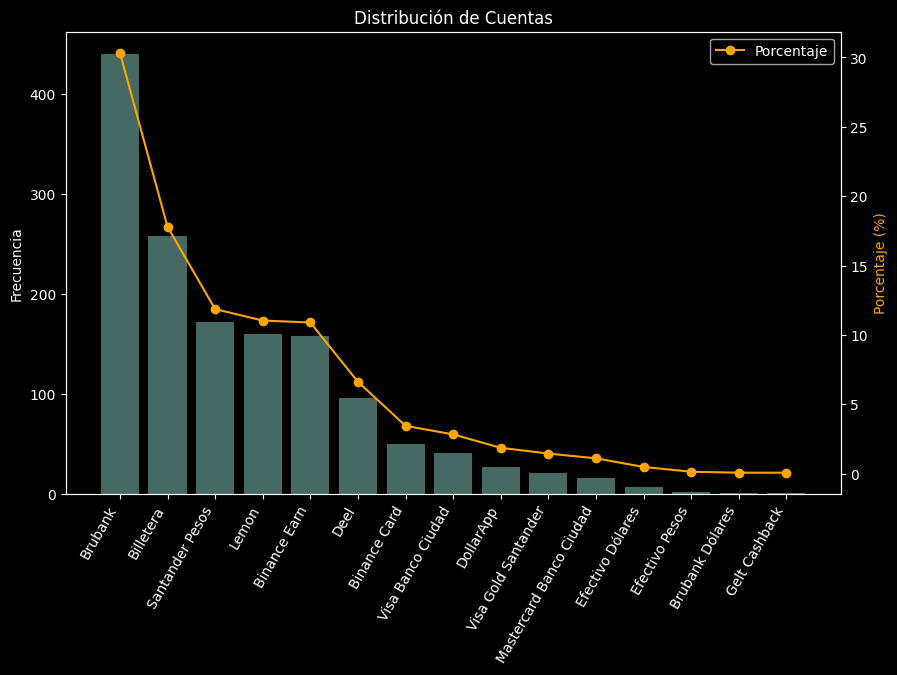

In [ ]:
# Configurar estilo de fondo oscuro y colores personalizados
plt.style.use('dark_background')
color_numero = 'white'   # Color blanco para los números en el eje y

# Calcular la frecuencia y el porcentaje de cada cuenta
cuenta_analysis = df_22_23['Cuenta'].value_counts().reset_index()
cuenta_analysis.columns = ['Cuenta', 'Frecuencia']
cuenta_analysis['Porcentaje'] = cuenta_analysis['Frecuencia'] / len(df_22_23) * 100

# Ordenar los datos por frecuencia en orden descendente
cuenta_analysis = cuenta_analysis.sort_values(by='Frecuencia', ascending=False)

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Gráfico de barras para la frecuencia
ax1.bar(cuenta_analysis['Cuenta'], cuenta_analysis['Frecuencia'], alpha=0.5)
ax1.set_ylabel('Frecuencia', color=color_numero)
ax1.tick_params(axis='y', labelcolor=color_numero)

# Gráfico de línea para el porcentaje
ax2.plot(cuenta_analysis['Cuenta'], cuenta_analysis['Porcentaje'], color='orange', marker='o')
ax2.set_ylabel('Porcentaje (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='white')

# Rotar los nombres de las cuentas en el eje x a 45 grados
ax1.set_xticklabels(cuenta_analysis['Cuenta'], rotation=60, ha='right')

# Título y leyendas
plt.title('Distribución de Cuentas')
plt.legend(['Porcentaje'], loc='upper right')

plt.show()

In [ ]:
# Mostrar los resultados del análisis univariado de la columna "Cuenta"
print(cuenta_analysis)

                     Cuenta  Frecuencia  Porcentaje
0                   Brubank         440   30.344828
1                 Billetera         258   17.793103
2           Santander Pesos         172   11.862069
3                     Lemon         160   11.034483
4              Binance Earn         158   10.896552
5                      Deel          96    6.620690
6              Binance Card          50    3.448276
7         Visa Banco Ciudad          41    2.827586
8                 DollarApp          27    1.862069
9       Visa Gold Santander          21    1.448276
10  Mastercard Banco Ciudad          16    1.103448
11         Efectivo Dólares           7    0.482759
12           Efectivo Pesos           2    0.137931
13          Brubank Dólares           1    0.068966
14            Gelt Cashback           1    0.068966


### Distribución de Moneda

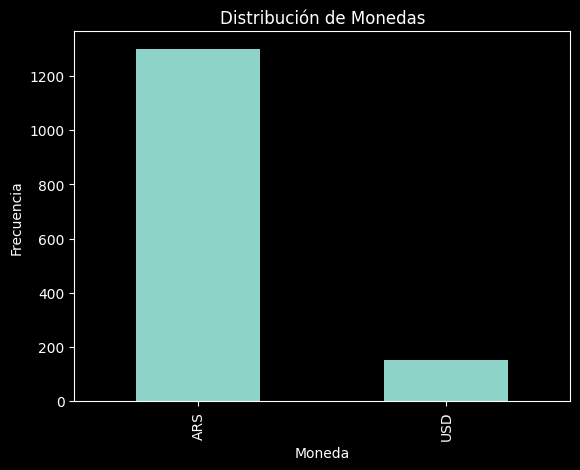

In [ ]:
moneda_analysis = df_22_23['Moneda'].value_counts()
moneda_analysis.plot(kind='bar')
plt.title('Distribución de Monedas')
plt.xlabel('Moneda')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
moneda_analysis = moneda_analysis.reset_index()
moneda_analysis.columns = ['Moneda', 'Frecuencia']
moneda_analysis['Porcentaje'] = moneda_analysis['Frecuencia'] / len(df_22_23) * 100
moneda_analysis = moneda_analysis.sort_values(by='Frecuencia', ascending=False)

print(moneda_analysis)

  Moneda  Frecuencia  Porcentaje
0    ARS        1299   89.586207
1    USD         151   10.413793


### Distribución de Categoría

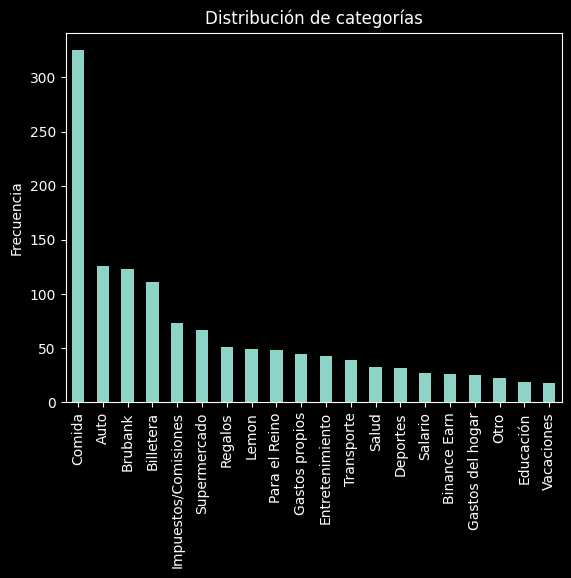

In [ ]:
categoria_analysis = df_22_23['Categoría'].value_counts()
top_categorias = categoria_analysis.head(20)
top_categorias.plot(kind='bar')
plt.title('Distribución de categorías')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
top_categorias = top_categorias.reset_index()
top_categorias.columns = ['Categoría', 'Frecuencia']
top_categorias['Porcentaje'] = top_categorias['Frecuencia'] / len(df_22_23) * 100
top_categorias = top_categorias.sort_values(by='Frecuencia', ascending=False)

print(top_categorias)

               Categoría  Frecuencia  Porcentaje
0                 Comida         325   22.413793
1                   Auto         126    8.689655
2                Brubank         123    8.482759
3              Billetera         111    7.655172
4   Impuestos/Comisiones          73    5.034483
5           Supermercado          67    4.620690
6                Regalos          51    3.517241
7                  Lemon          49    3.379310
8          Para el Reino          48    3.310345
9         Gastos propios          45    3.103448
10       Entretenimiento          43    2.965517
11            Transporte          39    2.689655
12                 Salud          33    2.275862
13              Deportes          32    2.206897
14               Salario          27    1.862069
15          Binance Earn          26    1.793103
16      Gastos del hogar          25    1.724138
17                  Otro          22    1.517241
18             Educación          19    1.310345
19            Vacaci